<a href="https://colab.research.google.com/github/RomiGeo/RomiGeo/blob/main/Copia_de_Copia_de_Romina_Marcovecchio_TP_Reglas_de_asociaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt # crear graficos
plt.rcParams["figure.figsize"] = (10,5) # cambiar el tamano de las figuras
import seaborn as sns # graficos con dataframes

import numpy as np # manipulacion de vectores
import pandas as pd # manipulacion de dataframes 

import missingno as msno # manipular y visualizar los valores perdidos Nans
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

Lectura de Datos

In [ ]:
from google.colab import drive
drive.mount('mushrooms.csv')

Drive already mounted at mushrooms.csv; to attempt to forcibly remount, call drive.mount("mushrooms.csv", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Importar la biblioteca pandas
import pandas as pd

# Leer el archivo CSV desde Google Drive
df = pd.read_csv('/content/mushrooms.csv/MyDrive/AI_2023/mushrooms.csv')

# Mostrar las primeras filas del DataFrame
print(df.head())

  class;cap-shape;cap-surface;cap-color;bruises;odor;gill-attachment;gill-spacing;gill-size;gill-color;stalk-shape;stalk-root;stalk-surface-above-ring;stalk-surface-below-ring;stalk-color-above-ring;stalk-color-below-ring;veil-type;veil-color;ring-number;ring-type;spore-print-color;population;habitat
0      p;x;s;n;t;p;f;c;n;k;e;e;s;s;w;w;p;w;o;p;k;s;u                                                                                                                                                                                                                                                         
1      e;x;s;y;t;a;f;c;b;k;e;c;s;s;w;w;p;w;o;p;n;n;g                                                                                                                                                                                                                                                         
2      e;b;s;w;t;l;f;c;b;n;e;c;s;s;w;w;p;w;o;p;n;n;m                                          

In [ ]:
file_gd ='/content/mushrooms.csv/MyDrive/AI_2023/mushrooms.csv'

In [ ]:
df = pd.read_csv(file_gd, sep= ";", header=0)

In [ ]:
# Mostrar las primeras filas del DataFrame
print(df.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

Describir dataset seleccionado
dataset “mushroom” : Este dataset incluye la descripción de especies de hongos que corresponden a dos familias, Familia Agaricus y Familia Lepiota. Cada especie es identificada como comestible (edibel) o venenosa (poisonous).Contiene la descripción de 8124 y 23 variables, que identifican características físicas de cada especie.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

<ipython-input-16-bea6ea28eb72>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


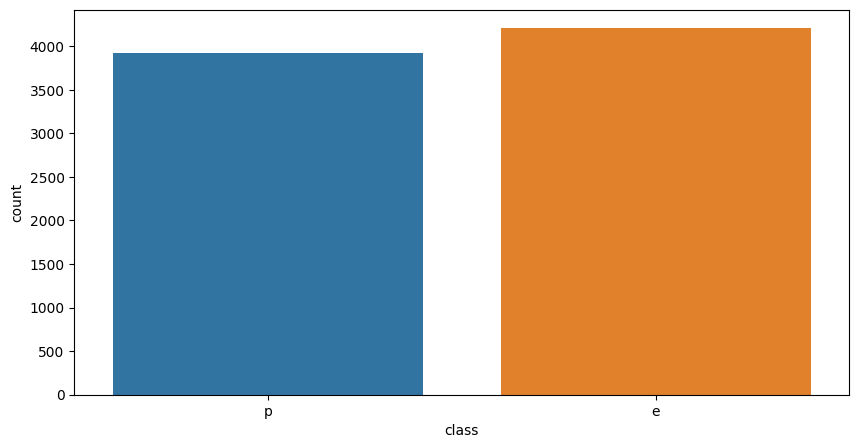

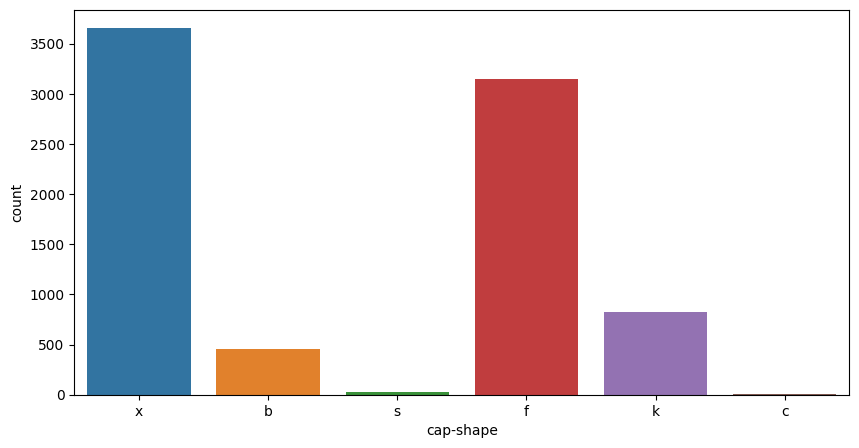

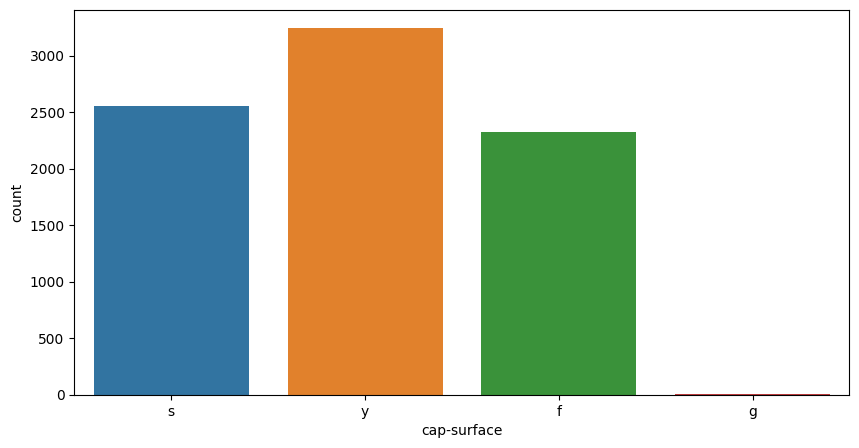

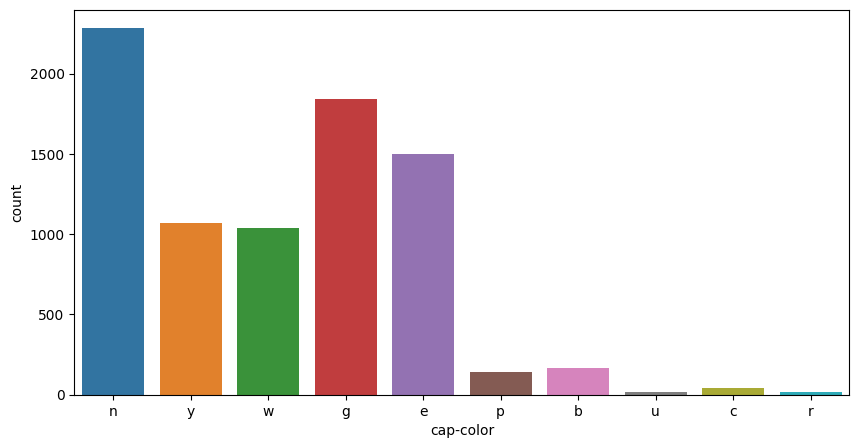

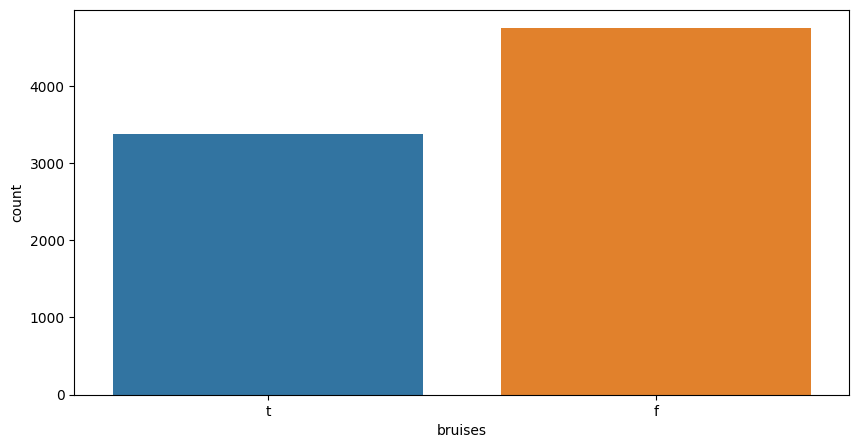

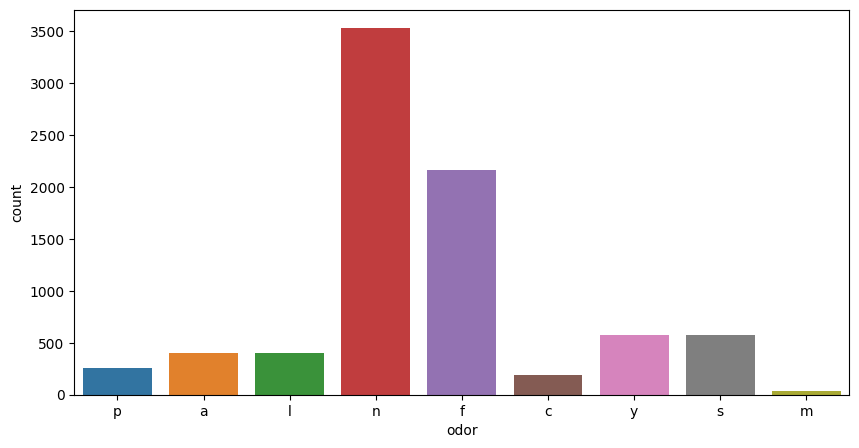

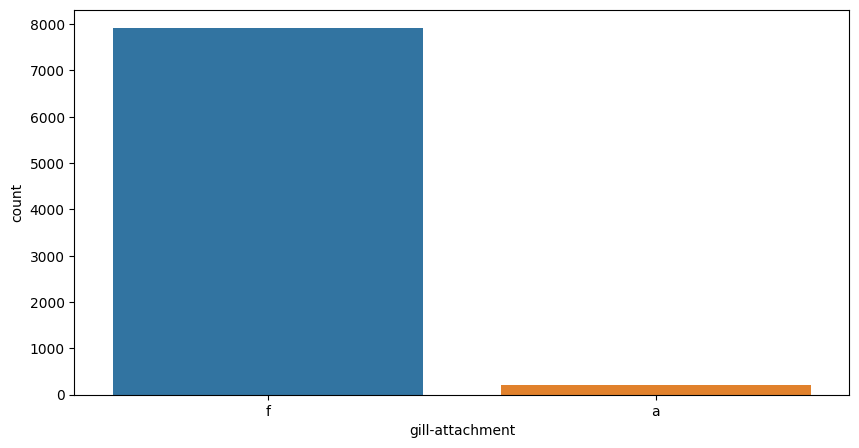

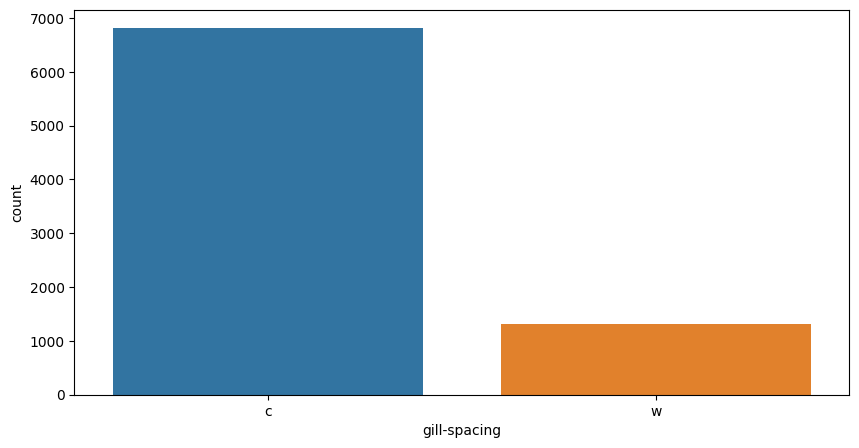

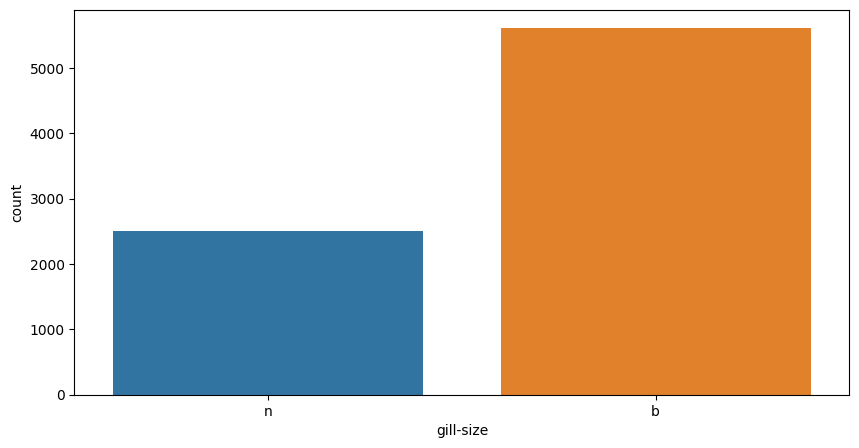

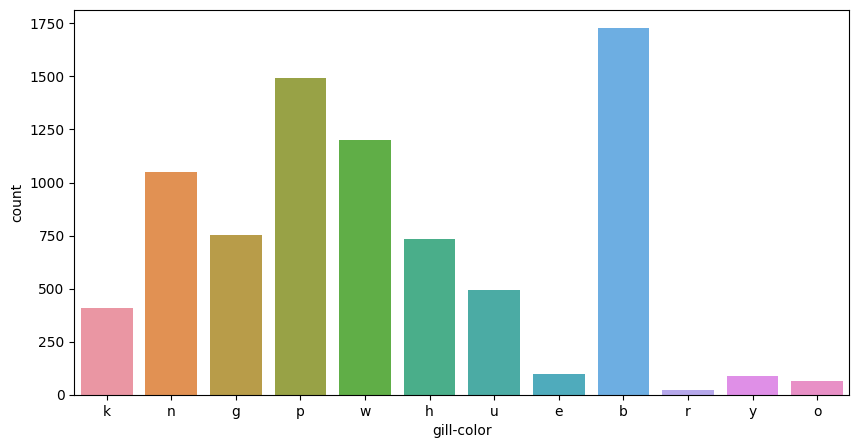

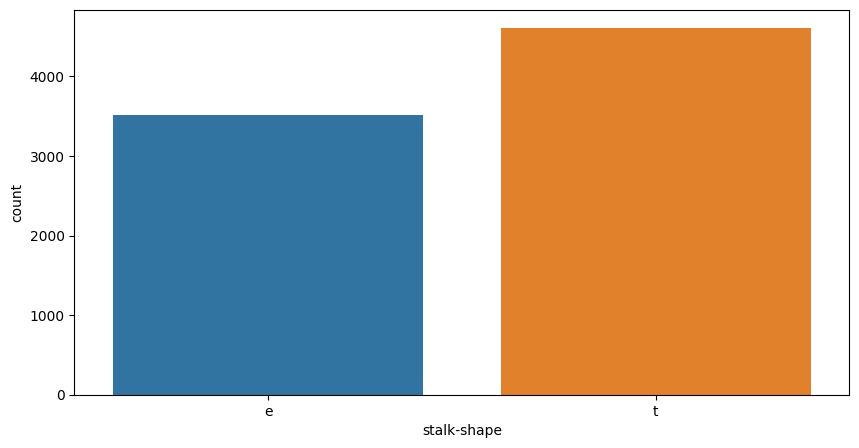

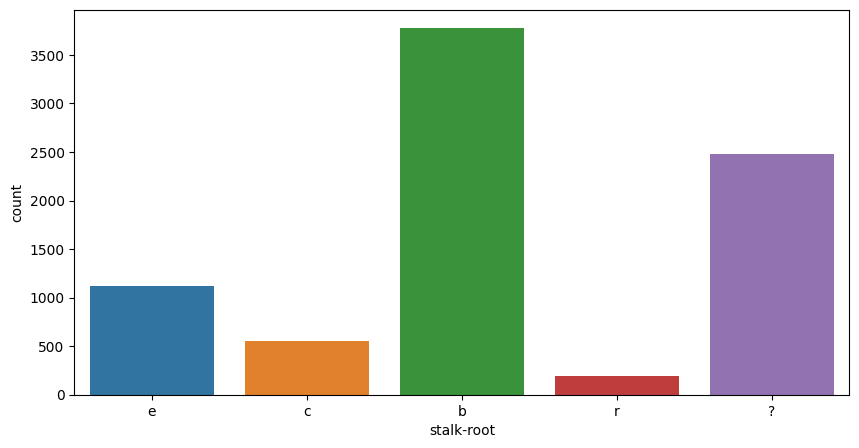

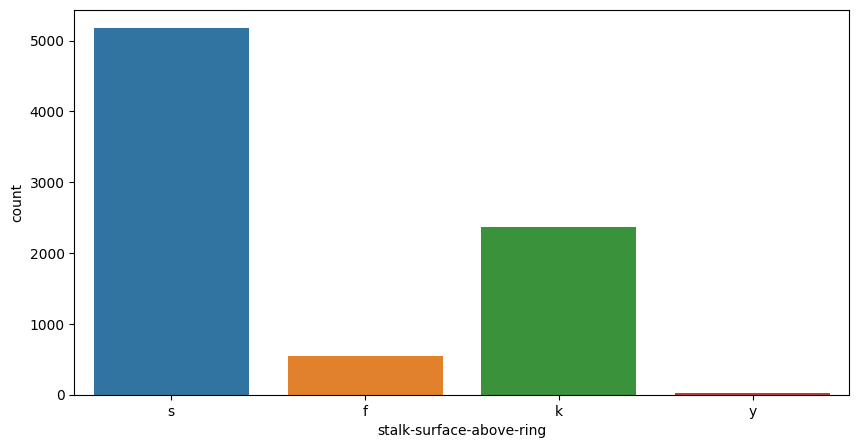

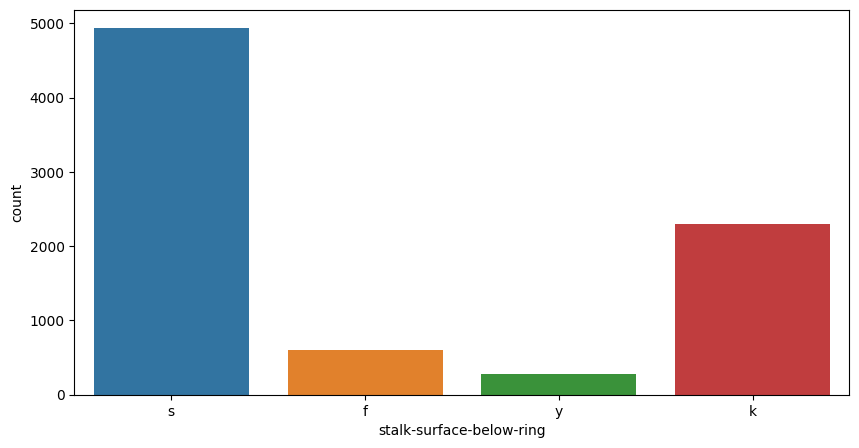

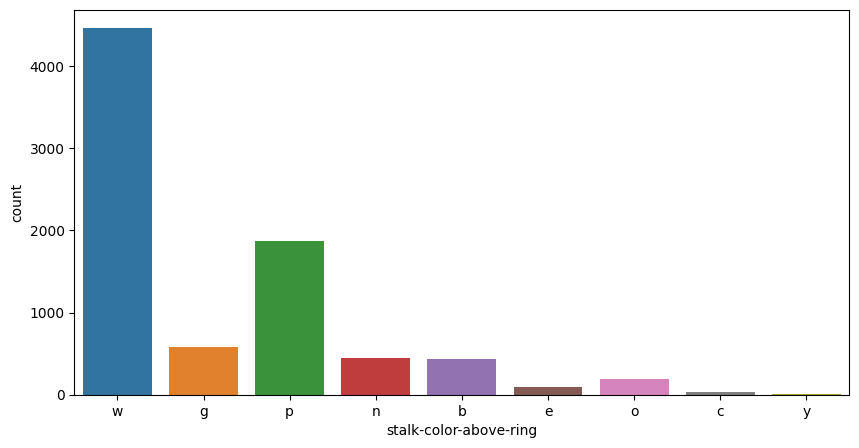

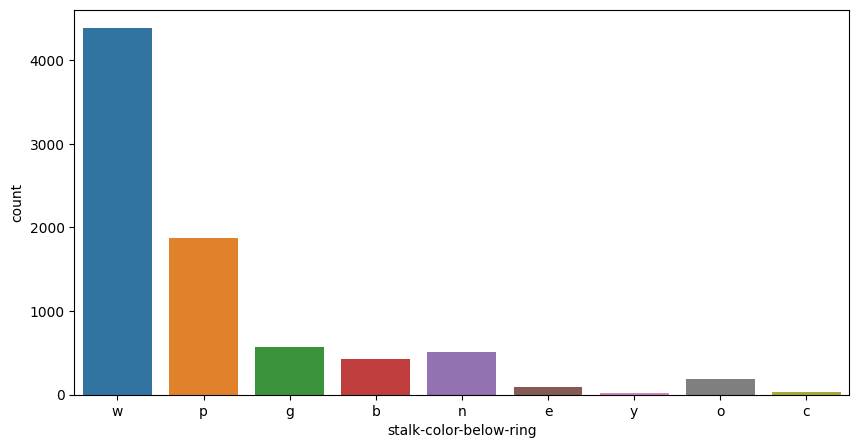

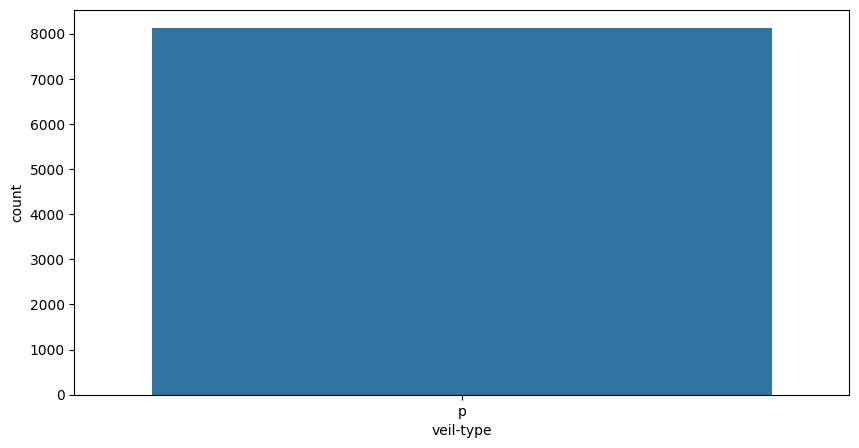

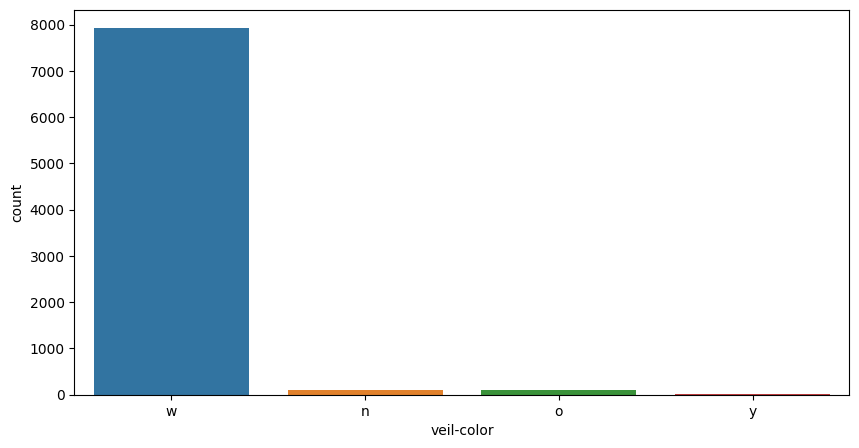

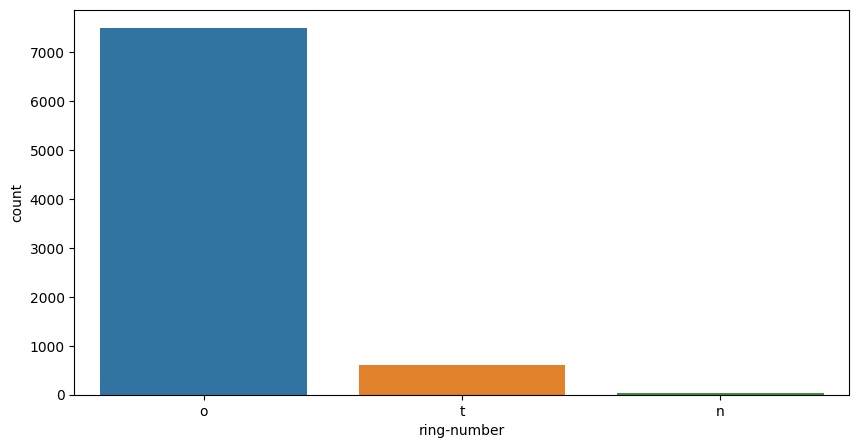

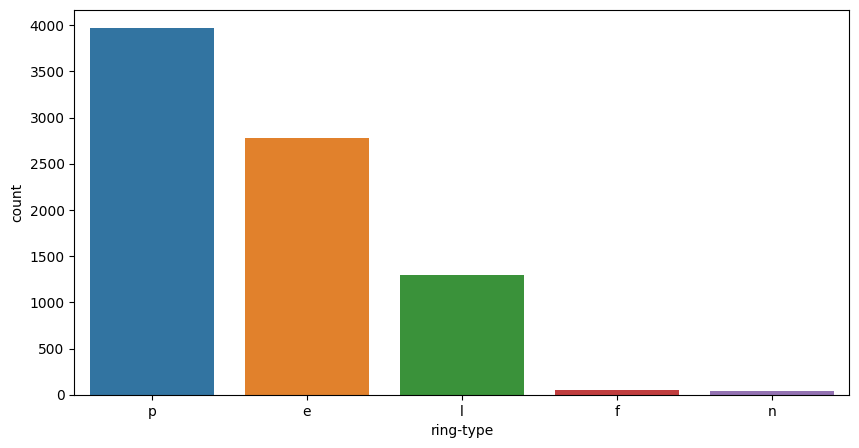

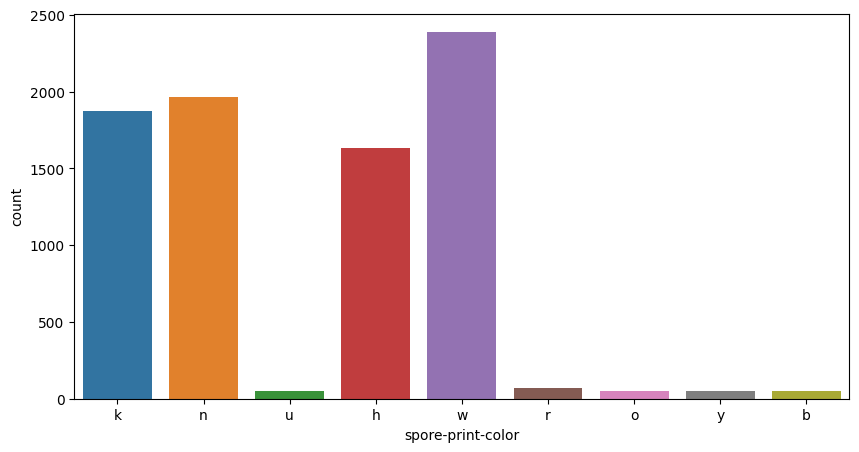

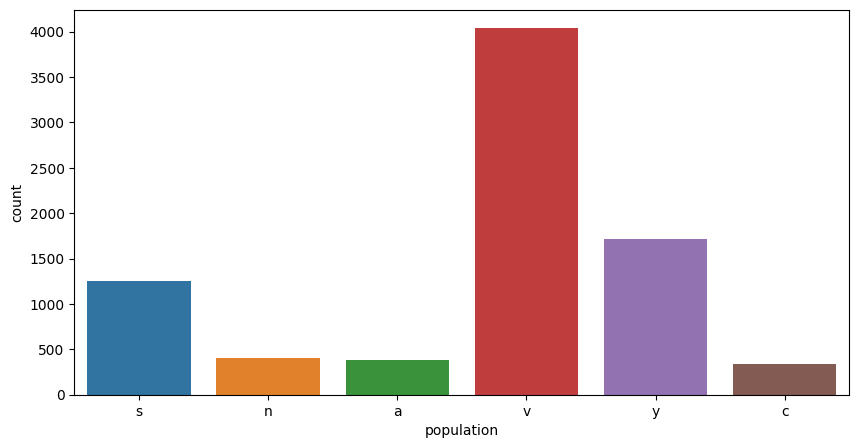

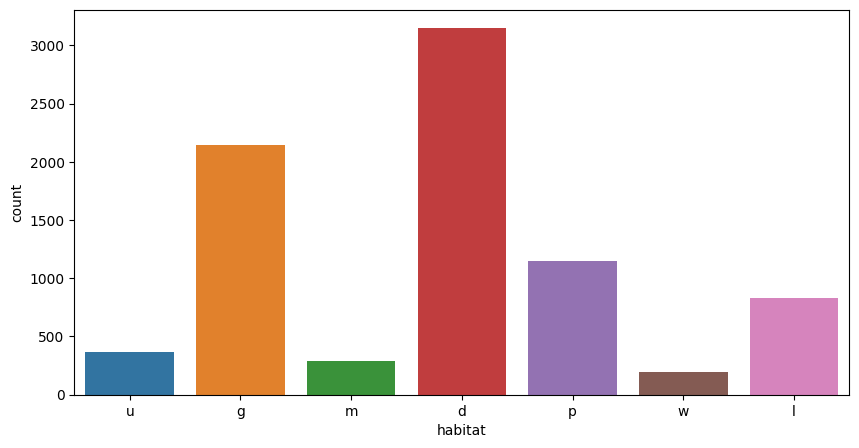

In [ ]:
# Data Visualisation
# countplot of every variable
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns_plot = sns.countplot(x=col, data=df)
    sns_plot.figure.savefig("{} countplot.png".format(col))

<ipython-input-17-d67c4b6d7aaf>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


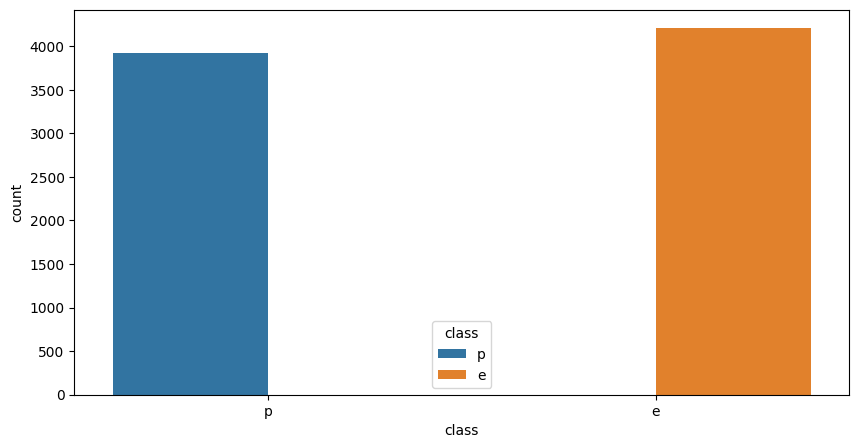

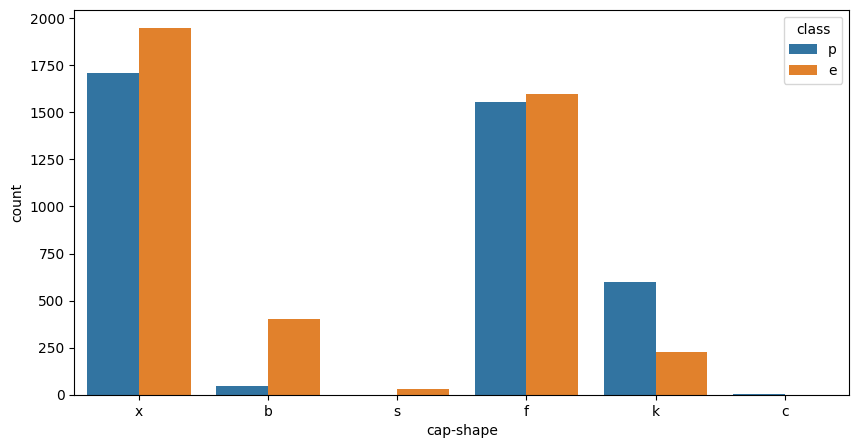

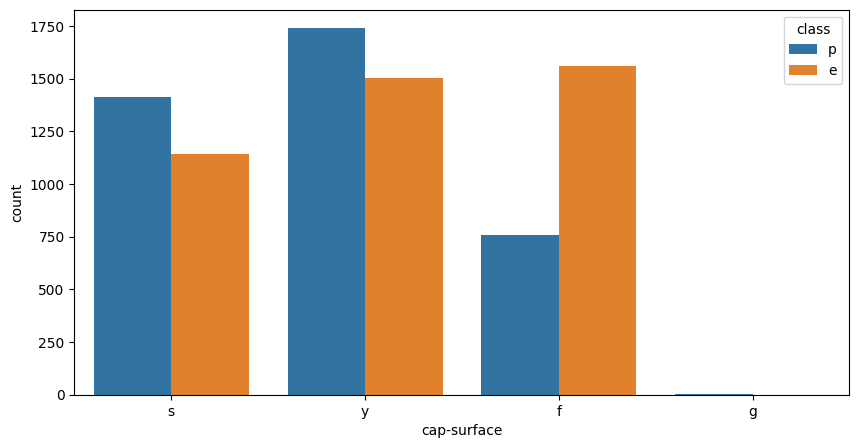

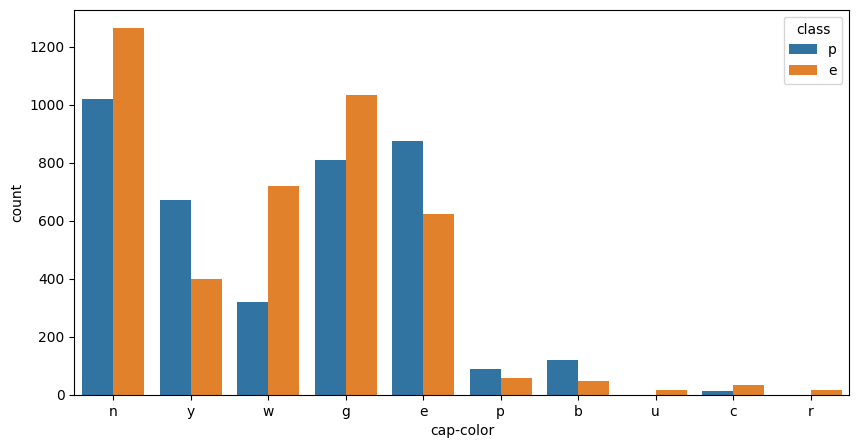

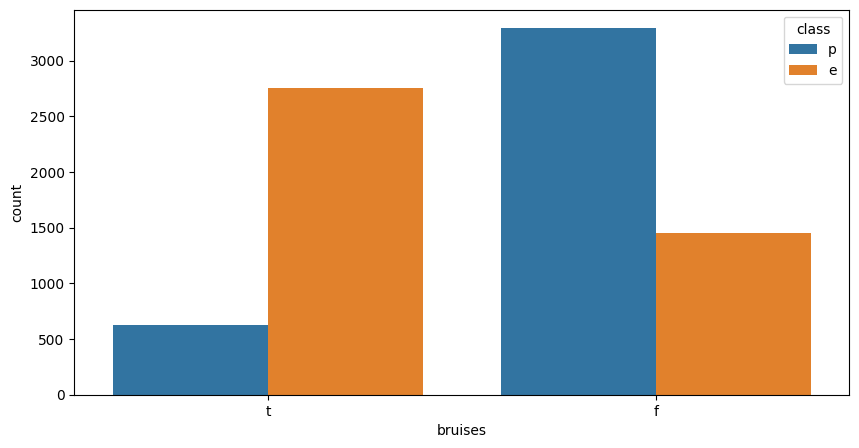

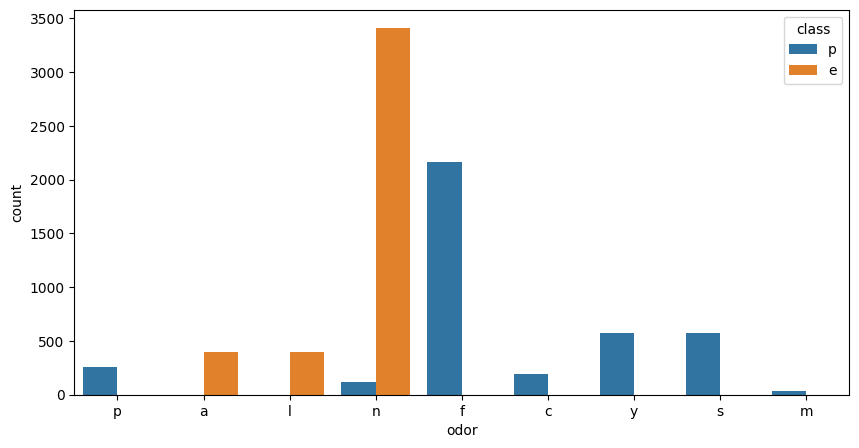

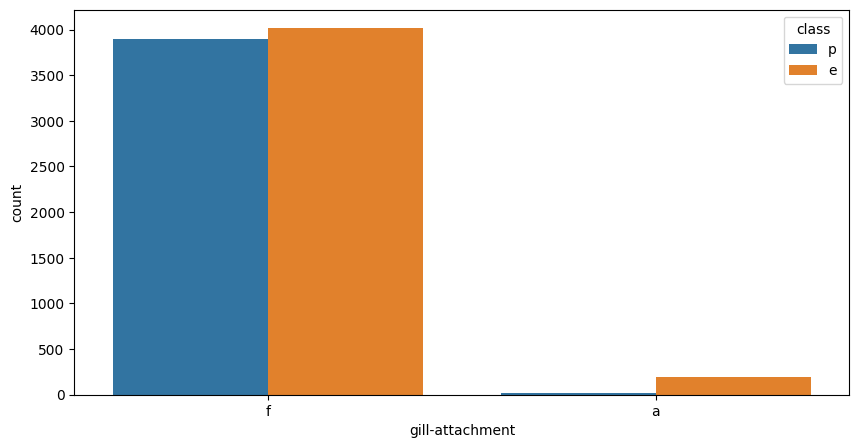

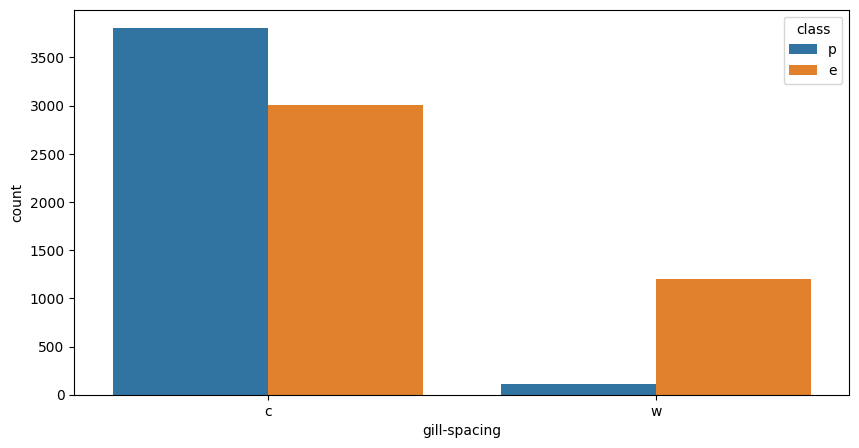

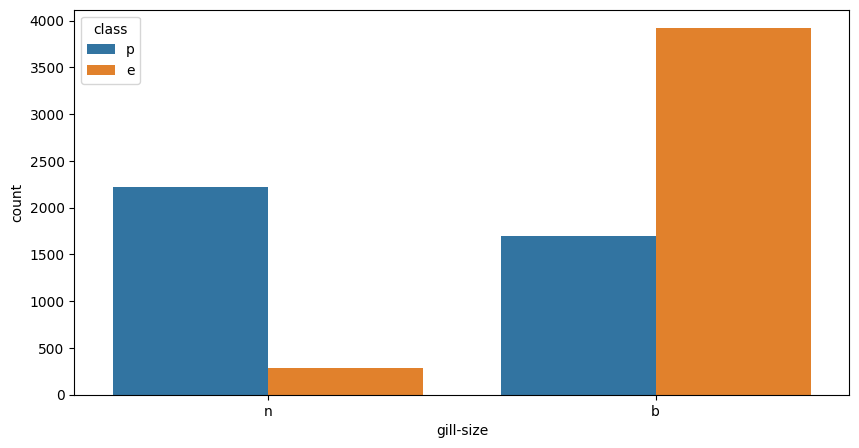

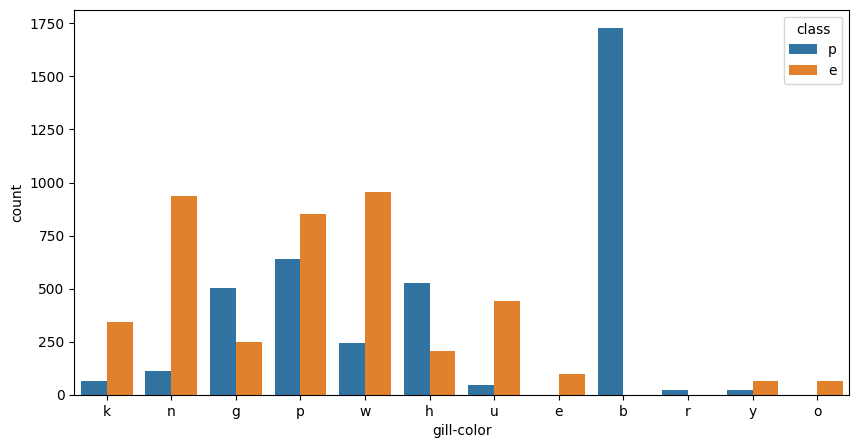

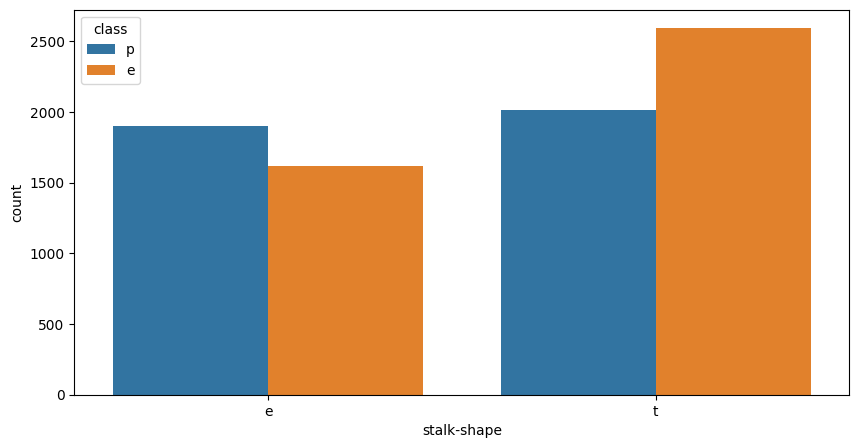

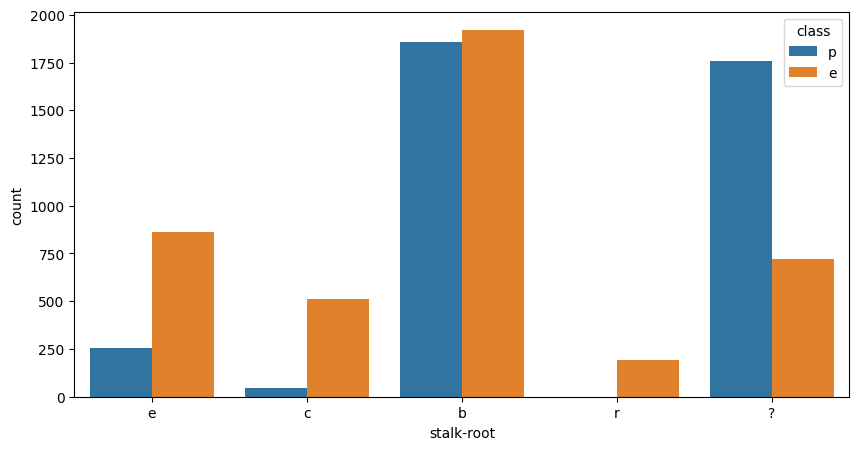

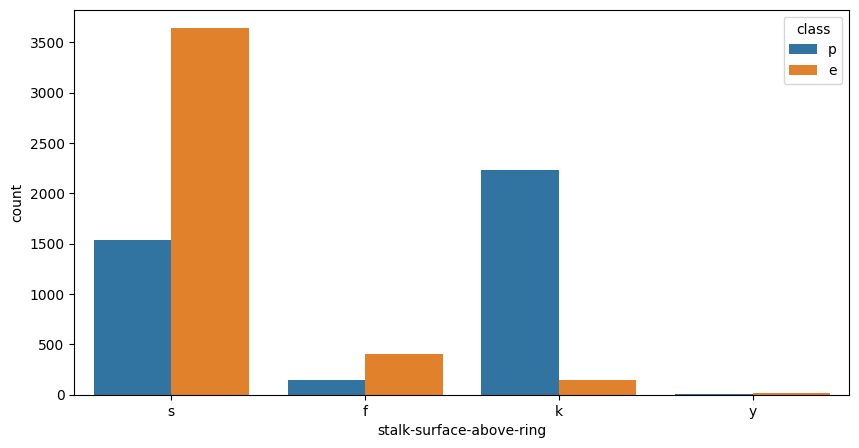

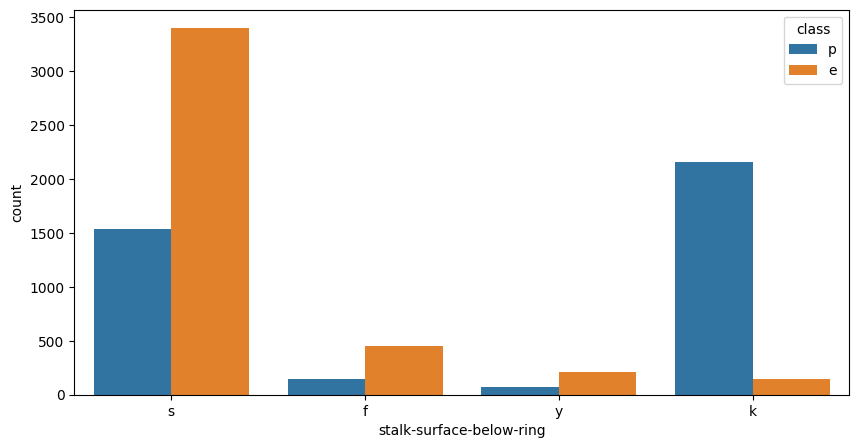

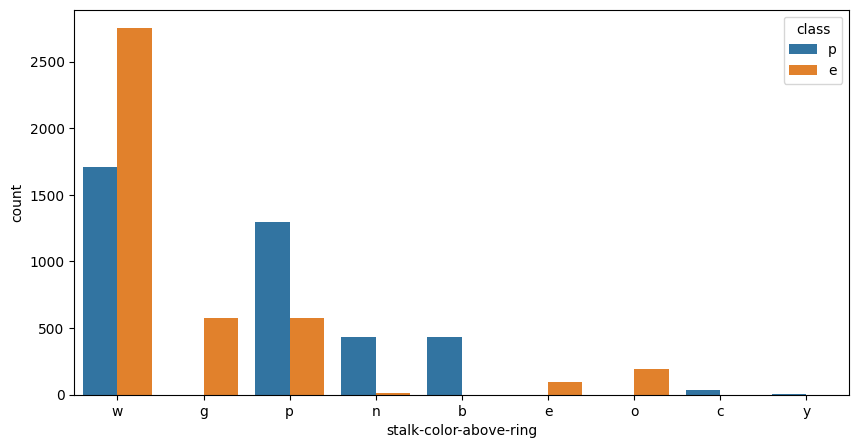

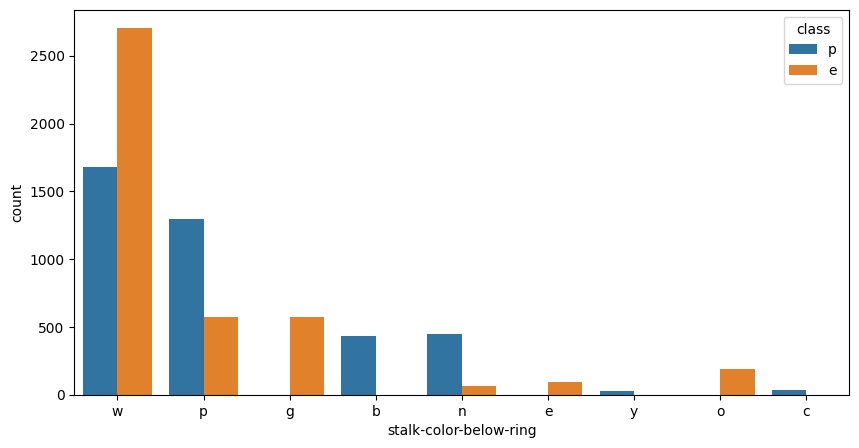

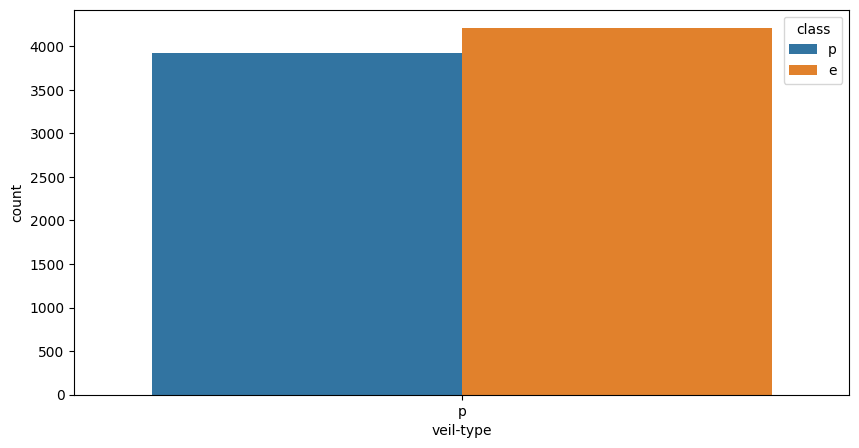

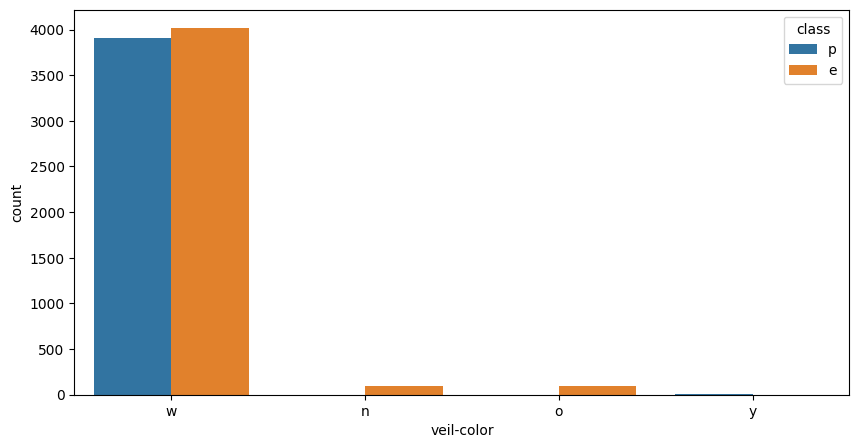

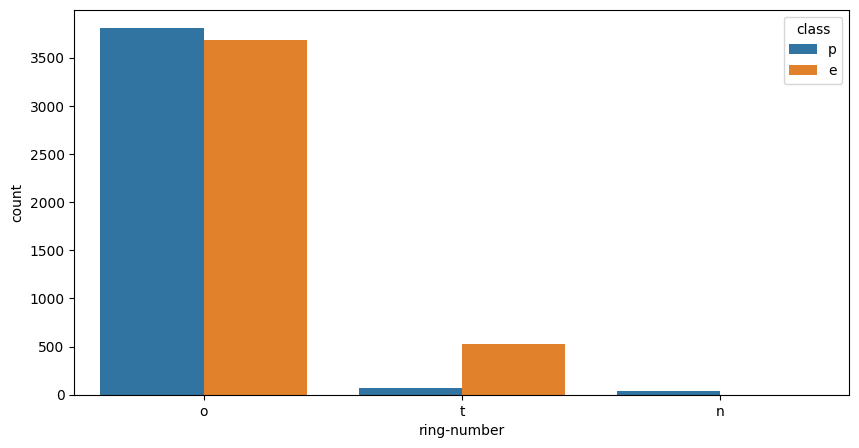

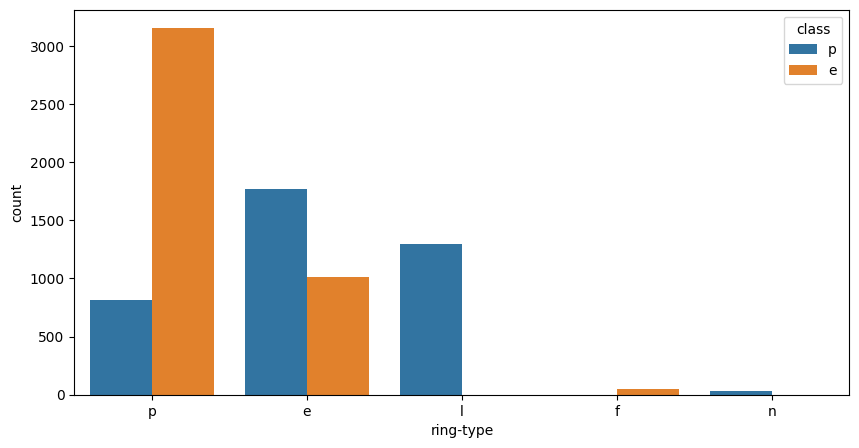

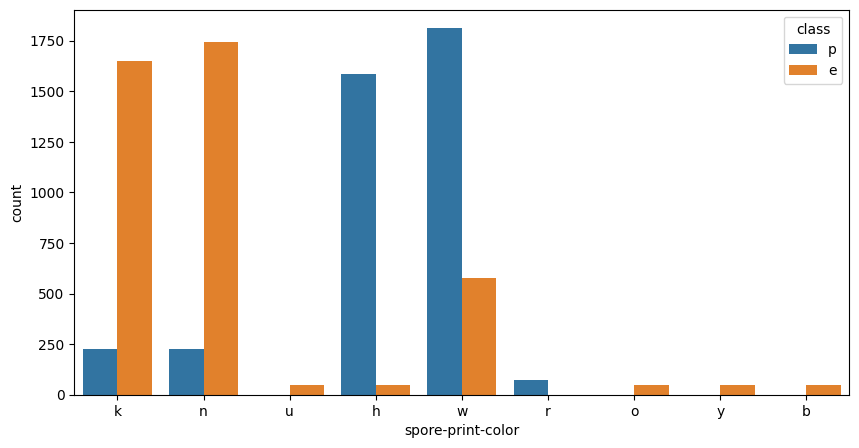

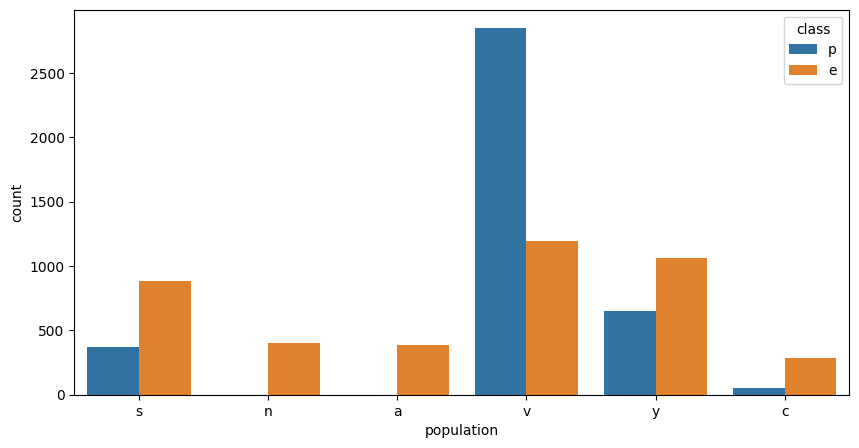

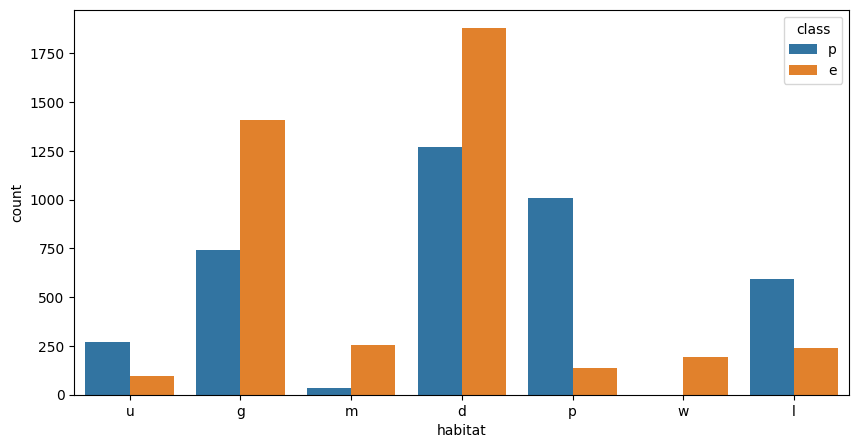

In [ ]:
# countplot of every variable with hue = class/target
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns_plot = sns.countplot(x=col, hue='class', data=df)
    sns_plot.figure.savefig("{} class countplot.png".format(col))

Reglas de Asociación_Objetivo:
El objetivo de aplicar Reglas de Asociación al dataset mushrooms es identificar patrones frecuentes de características de hongos comestibles y venenosos. Este conjunto de datos contiene información sobre diferentes características de hongos, como la forma del sombrero, el color, la textura, el olor, entre otros.

Al aplicar Reglas de Asociación, se pueden identificar patrones entre estas características, como por ejemplo, si los hongos con un sombrero convexo tienden a ser venenosos o si los hongos con un olor almizclado son comestibles. Estos patrones pueden ser útiles para la identificación de hongos y la prevención de envenenamientos.

Algunos patrones que se esperaría encontrar en el conjunto de datos mushrooms utilizando Reglas de Asociación podrían ser:

Si el hongo tiene un sombrero convexo y un tallo grueso, entonces es más probable que sea venenoso.
Si el hongo tiene un olor a anís y una superficie escamosa, entonces es más probable que sea comestible.
Si el hongo tiene un sombrero marrón y láminas libres, entonces es más probable que sea comestible.
Sin embargo, es importante tener en cuenta que estos patrones solo son hipótesis y que deben ser validados y evaluados cuidadosamente antes de tomar cualquier decisión basada en ellos.


Pre_procesamiento datos
Aplicaría la función get_dummies() de pandas, ya que en este caso no son transacciones para aplicar la función de Mlextend TransactionEncoder(). Las variables, son variables categoricas nominales, a las cuales las transforamaremos aplicando función get_dummies().

In [ ]:
# Preprocessing
# get_dummies for all except target variable
dummies_columns = [list(df.columns)[i] for i in np.arange(1,23)]
dataset = pd.get_dummies(df, columns=dummies_columns)
# Map target variable class: 1 = poisonous, 0 = edible
dataset['class'] = dataset['class'].map({"p": 1, "e": 0})

In [ ]:
dataset.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0


Extracción Itemsets Frecuentes

In [ ]:
from mlxtend.frequent_patterns import apriori

apriori(dataset, min_support=0.5)

,support,itemsets
0,0.584441,(21)
1,0.974151,(33)
2,0.838503,(34)
3,0.690793,(36)
4,0.567208,(51)
...,...,...
146,0.772033,"(33, 34, 83, 86, 89)"
147,0.588872,"(33, 36, 83, 86, 89)"
148,0.567208,"(33, 83, 51, 86, 89)"
149,0.559330,"(33, 83, 86, 89, 59)"


In [ ]:
apriori(dataset, min_support=0.8, use_colnames=True)

,support,itemsets
0,0.974151,(gill-attachment_f)
1,0.838503,(gill-spacing_c)
2,1.000000,(veil-type_p)
3,0.975382,(veil-color_w)
4,0.921713,(ring-number_o)
5,0.812654,"(gill-attachment_f, gill-spacing_c)"
6,0.974151,"(veil-type_p, gill-attachment_f)"
7,0.973166,"(gill-attachment_f, veil-color_w)"
8,0.898080,"(gill-attachment_f, ring-number_o)"
9,0.838503,"(veil-type_p, gill-spacing_c)"


Selección y filtrado de Itemsets frecuentes

In [ ]:
frequent_itemsets = apriori(dataset, min_support=0.8, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.974151,(gill-attachment_f),1
1,0.838503,(gill-spacing_c),1
2,1.000000,(veil-type_p),1
3,0.975382,(veil-color_w),1
4,0.921713,(ring-number_o),1
5,0.812654,"(gill-attachment_f, gill-spacing_c)",2
6,0.974151,"(veil-type_p, gill-attachment_f)",2
7,0.973166,"(gill-attachment_f, veil-color_w)",2
8,0.898080,"(gill-attachment_f, ring-number_o)",2
9,0.838503,"(veil-type_p, gill-spacing_c)",2


Seleccionamos los resultados que cumplen determinado criterio

In [ ]:
frequent_itemsets[ (frequent_itemsets['length'] == 3) &
                   (frequent_itemsets['support'] >= 0.7) ]

,support,itemsets,length
14,0.812654,"(veil-type_p, gill-attachment_f, gill-spacing_c)",3
15,0.812654,"(gill-attachment_f, gill-spacing_c, veil-color_w)",3
16,0.973166,"(veil-type_p, gill-attachment_f, veil-color_w)",3
17,0.898080,"(veil-type_p, gill-attachment_f, ring-number_o)",3
18,0.897095,"(gill-attachment_f, ring-number_o, veil-color_w)",3
19,0.814870,"(veil-type_p, gill-spacing_c, veil-color_w)",3
20,0.897095,"(veil-type_p, ring-number_o, veil-color_w)",3


Generación de reglas de asociación a partir de los itemsets frecuentes:
Elegimos la metrica "confidence" para aplicar las reglas de asociación

In [ ]:
from mlxtend.frequent_patterns import association_rules

# utilizamos confianza = 0.9
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.9)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(gill-spacing_c),(gill-attachment_f),0.838503,0.974151,0.812654,0.969172,0.994889,-0.004175,0.838503
1,(veil-type_p),(gill-attachment_f),1.000000,0.974151,0.974151,0.974151,1.000000,0.000000,1.000000
2,(gill-attachment_f),(veil-type_p),0.974151,1.000000,0.974151,1.000000,1.000000,0.000000,inf
3,(gill-attachment_f),(veil-color_w),0.974151,0.975382,0.973166,0.998989,1.024203,0.022997,24.353767
4,(veil-color_w),(gill-attachment_f),0.975382,0.974151,0.973166,0.997728,1.024203,0.022997,11.379452
...,...,...,...,...,...,...,...,...,...
61,"(gill-attachment_f, veil-color_w)","(veil-type_p, ring-number_o)",0.973166,0.921713,0.897095,0.921832,1.000128,0.000115,1.001511
62,"(ring-number_o, veil-color_w)","(veil-type_p, gill-attachment_f)",0.897095,0.974151,0.897095,1.000000,1.026535,0.023189,inf
63,(gill-attachment_f),"(veil-type_p, ring-number_o, veil-color_w)",0.974151,0.897095,0.897095,0.920900,1.026535,0.023189,1.300942
64,(ring-number_o),"(veil-type_p, gill-attachment_f, veil-color_w)",0.921713,0.973166,0.897095,0.973291,1.000128,0.000115,1.004668


Post procesamiento de las reglas de asociación

In [ ]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(gill-spacing_c),(gill-attachment_f),0.838503,0.974151,0.812654,0.969172,0.994889,-0.004175,0.838503,1
1,(veil-type_p),(gill-attachment_f),1.000000,0.974151,0.974151,0.974151,1.000000,0.000000,1.000000,1
2,(gill-attachment_f),(veil-type_p),0.974151,1.000000,0.974151,1.000000,1.000000,0.000000,inf,1
3,(gill-attachment_f),(veil-color_w),0.974151,0.975382,0.973166,0.998989,1.024203,0.022997,24.353767,1
4,(veil-color_w),(gill-attachment_f),0.975382,0.974151,0.973166,0.997728,1.024203,0.022997,11.379452,1
...,...,...,...,...,...,...,...,...,...,...
61,"(gill-attachment_f, veil-color_w)","(veil-type_p, ring-number_o)",0.973166,0.921713,0.897095,0.921832,1.000128,0.000115,1.001511,2
62,"(ring-number_o, veil-color_w)","(veil-type_p, gill-attachment_f)",0.897095,0.974151,0.897095,1.000000,1.026535,0.023189,inf,2
63,(gill-attachment_f),"(veil-type_p, ring-number_o, veil-color_w)",0.974151,0.897095,0.897095,0.920900,1.026535,0.023189,1.300942,1
64,(ring-number_o),"(veil-type_p, gill-attachment_f, veil-color_w)",0.921713,0.973166,0.897095,0.973291,1.000128,0.000115,1.004668,1


In [ ]:
rules[ (rules['antecedent_len'] >= 3) &
       (rules['confidence'] > 0.95) &
       (rules['lift'] > 0.95) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
46,"(veil-type_p, gill-attachment_f, gill-spacing_c)",(veil-color_w),0.812654,0.975382,0.812654,1.000000,1.025240,0.020006,inf,3
47,"(veil-type_p, gill-spacing_c, veil-color_w)",(gill-attachment_f),0.814870,0.974151,0.812654,0.997281,1.023744,0.018848,9.506811,3
48,"(gill-attachment_f, gill-spacing_c, veil-color_w)",(veil-type_p),0.812654,1.000000,0.812654,1.000000,1.000000,0.000000,inf,3
53,"(veil-type_p, gill-attachment_f, ring-number_o)",(veil-color_w),0.898080,0.975382,0.897095,0.998904,1.024116,0.021125,22.451994,3
55,"(veil-type_p, ring-number_o, veil-color_w)",(gill-attachment_f),0.897095,0.974151,0.897095,1.000000,1.026535,0.023189,inf,3
56,"(gill-attachment_f, ring-number_o, veil-color_w)",(veil-type_p),0.897095,1.000000,0.897095,1.000000,1.000000,0.000000,inf,3


Análisis de las Reglas de Asociación:
Obtuvimos seis reglas de asociación, con alta nivel de confianza de describir cuatro características físicas juntas en una especie de hongo. En general caractreísticas del velo se encuentran asociadas con un tipo de inserción branquial en el estipe del hongo. Podríamos utilizar estas reglas de asociación para elegir algunas de las variables y utilizarla para reconocer la otra. Así cómo también , podemos seleccionar una de las variables, para utilizar en un modelo de clasificación, en el que queramos asociar el rasgo seleccionado con la posibilidad de decidir si es comestible o venenos.